In [1]:
#クラスタリング分析
import pandas as pd
import numpy as np

K-means 非階層的クラスタ分析 → 決められたクラスタ数に応じて <br>
Ward法 階層的クラスタリング → 結果を木構造で出力、長いほど類似度が低く、短いほど類似度が高い

# k-means
1. 初期値となる重心点をサンプルデータ (データセット全体からランダムに集めた少量のデータ) から決定。
2. 各サンプルから最も近い距離にある重心点を計算によって求め、クラスタを構成。
3. 2.で求めたクラスタごとに重心を求め、2. を再度実行する。2. ～ 3. を決められた回数繰り返し実行し、大きな変化がなくなるまで計算。

In [3]:
from sklearn.cluster import KMeans

In [4]:
!wget http://pythondatascience.plavox.info/wp-content/uploads/2016/05/Wholesale_customers_data.csv

--2022-04-22 12:28:50--  http://pythondatascience.plavox.info/wp-content/uploads/2016/05/Wholesale_customers_data.csv
pythondatascience.plavox.info (pythondatascience.plavox.info) をDNSに問いあわせています... 54.168.155.129, 18.180.82.32
pythondatascience.plavox.info (pythondatascience.plavox.info)|54.168.155.129|:80 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 301 Moved Permanently
場所: https://pythondatascience.plavox.info/wp-content/uploads/2016/05/Wholesale_customers_data.csv [続く]
--2022-04-22 12:28:50--  https://pythondatascience.plavox.info/wp-content/uploads/2016/05/Wholesale_customers_data.csv
pythondatascience.plavox.info (pythondatascience.plavox.info)|54.168.155.129|:443 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 200 OK
長さ: 15021 (15K) [application/octet-stream]
`Wholesale_customers_data.csv' に保存中

Wholesale_customers 100%[===================>]  14.67K  --.-KB/s 時間 0.05s      

2022-04-22 12:28:50 (322 KB/s) - `Wholesale_customers_data.csv' へ保存完了 [15021/15021]



In [5]:
cust_df = pd.read_csv("Wholesale_customers_data.csv")

In [6]:
cust_df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [7]:
del(cust_df["Channel"])
del(cust_df["Region"])
cust_df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [17]:
cust_df_t = cust_df.T

In [18]:
pred = KMeans(n_clusters=4).fit_predict(cust_df)
pred

array([2, 0, 2, 2, 1, 2, 2, 2, 2, 0, 0, 2, 1, 0, 1, 2, 0, 2, 2, 2, 2, 2,
       1, 3, 1, 2, 2, 2, 0, 1, 2, 2, 2, 1, 2, 0, 1, 0, 0, 1, 1, 2, 0, 0,
       2, 0, 0, 3, 2, 0, 2, 2, 1, 0, 1, 2, 0, 0, 2, 2, 2, 3, 2, 0, 2, 3,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 3, 3, 1,
       2, 1, 2, 2, 3, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 1, 2, 2, 0, 0, 2, 0,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 0,
       1, 2, 2, 2, 2, 1, 0, 3, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2, 1, 0,
       2, 2, 0, 0, 1, 2, 2, 0, 2, 2, 2, 0, 2, 3, 2, 2, 0, 0, 0, 2, 0, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 3, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       0, 0, 0, 2, 0, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,

In [10]:
cust_df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [11]:
cust_df_t

,0,1,2,3,4,5,6,7,8,9,...,430,431,432,433,434,435,436,437,438,439
Fresh,12669,7057,6353,13265,22615,9413,12126,7579,5963,6006,...,3097,8533,21117,1982,16731,29703,39228,14531,10290,2787
Milk,9656,9810,8808,1196,5410,8259,3199,4956,3648,11093,...,4230,5506,1162,3218,3922,12051,1431,15488,1981,1698
Grocery,7561,9568,7684,4221,7198,5126,6975,9426,6192,18881,...,16483,5160,4754,1493,7994,16027,764,30243,2232,2510
Frozen,214,1762,2405,6404,3915,666,480,1669,425,1159,...,575,13486,269,1541,688,13135,4510,437,1038,65
Detergents_Paper,2674,3293,3516,507,1777,1795,3140,3321,1716,7425,...,241,1377,1328,356,2371,182,93,14841,168,477
Delicassen,1338,1776,7844,1788,5185,1451,545,2566,750,2098,...,2080,1498,395,1449,838,2204,2346,1867,2125,52


In [20]:
cust_df["cluster_id"] = pred

In [21]:
cust_df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster_id
0,12669,9656,7561,214,2674,1338,2
1,7057,9810,9568,1762,3293,1776,0
2,6353,8808,7684,2405,3516,7844,2
3,13265,1196,4221,6404,507,1788,2
4,22615,5410,7198,3915,1777,5185,1
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,1
436,39228,1431,764,4510,93,2346,1
437,14531,15488,30243,437,14841,1867,0
438,10290,1981,2232,1038,168,2125,2


In [22]:
cust_df["cluster_id"].value_counts()

2    276
0     95
1     58
3     11
Name: cluster_id, dtype: int64

In [23]:
cust_df[cust_df['cluster_id']==0].mean()

Fresh                4808.842105
Milk                10525.010526
Grocery             16909.789474
Frozen               1462.589474
Detergents_Paper     7302.400000
Delicassen           1650.884211
cluster_id              0.000000
dtype: float64

In [24]:
cust_df[cust_df['cluster_id']==1].mean()

Fresh               36144.482759
Milk                 5471.465517
Grocery              6128.793103
Frozen               6298.655172
Detergents_Paper     1064.000000
Delicassen           2316.724138
cluster_id              1.000000
dtype: float64

In [25]:
cust_df[cust_df['cluster_id']==2].mean()

Fresh               9087.463768
Milk                3027.427536
Grocery             3753.514493
Frozen              2817.985507
Detergents_Paper    1003.003623
Delicassen          1040.525362
cluster_id             2.000000
dtype: float64

In [35]:
cust_df[cust_df['cluster_id']==3].mean()

Fresh               19888.272727
Milk                36142.363636
Grocery             45517.454545
Frozen               6328.909091
Detergents_Paper    21417.090909
Delicassen           8414.000000
cluster_id              3.000000
dtype: float64

In [30]:
# 可視化（積み上げ棒グラフ）
import matplotlib.pyplot as plt
 
clusterinfo = pd.DataFrame()
for i in range(4):
    clusterinfo['cluster' + str(i)] = cust_df[cust_df['cluster_id'] == i].mean()
clusterinfo = clusterinfo.drop('cluster_id')

clusterinfo

,cluster0,cluster1,cluster2,cluster3
Fresh,4808.842105,36144.482759,9087.463768,19888.272727
Milk,10525.010526,5471.465517,3027.427536,36142.363636
Grocery,16909.789474,6128.793103,3753.514493,45517.454545
Frozen,1462.589474,6298.655172,2817.985507,6328.909091
Detergents_Paper,7302.400000,1064.000000,1003.003623,21417.090909
Delicassen,1650.884211,2316.724138,1040.525362,8414.000000


[Text(0, 0, 'cluster0'),
 Text(1, 0, 'cluster1'),
 Text(2, 0, 'cluster2'),
 Text(3, 0, 'cluster3')]

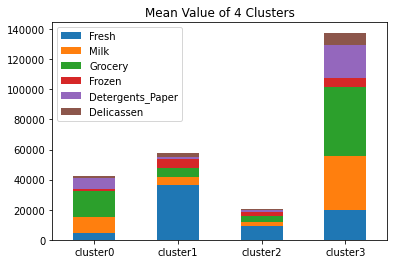

In [32]:
my_plot = clusterinfo.T.plot(kind='bar', stacked=True, title="Mean Value of 4 Clusters")
my_plot.set_xticklabels(my_plot.xaxis.get_majorticklabels(), rotation=0)